Analyzing the sports data - this analytics case study is all about analyzing different aspect of the odi series played in 2018.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math



*   Importing the data


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/AmiAnurag/Data-analytics-case-study-1/main/1%20-%202019%20ODI%20Cricket%20Matches.xlsx%20-%20Sheet1.csv')
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,6-Jan-18,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,9-Jan-18,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,11-Jan-18,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,13-Jan-18,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,13-Jan-18,ODI # 3950


Transform the margin column into two different columns - one for runs and another for wicket

In [4]:
df.dropna(inplace=True)
run=[]
wick=[]
for i in df.Margin:
  if 'run' in i:
    run.append(i)
    wick.append(np.nan)
  else:
    run.append(np.nan)
    wick.append(i)

In [5]:
run=pd.Series(run)
wick=pd.Series(wick)
df['Run Margin']=run
df['Wicket Margin']=wick
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Run Margin,Wicket Margin
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,6-Jan-18,ODI # 3946,61 runs,NaN
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,9-Jan-18,ODI # 3947,NaN,8 wickets
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,11-Jan-18,ODI # 3948,NaN,4 wickets
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,13-Jan-18,ODI # 3949,183 runs,NaN
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,13-Jan-18,ODI # 3950,67 runs,NaN


Which country played the most odi in 2018?

In [6]:
country=[i for i in df['Team 1']]
country+=[i for i in df['Team 2']]
len(country)

246

In [7]:
country=pd.Series(country)
print('Hence ',country.value_counts().index[0],' played most odi in 2018')

Hence  Zimbabwe  played most odi in 2018


Top three countries who won the most odi's

In [8]:
print('Top three countries who won most odi in 2018 are :')
df['Winner'].value_counts().head(3)

Top three countries who won most odi in 2018 are :


England       17
India         14
Bangladesh    13
Name: Winner, dtype: int64

How was the performance of Srilanka?

Winning percent of Srilanka is 37.5 %


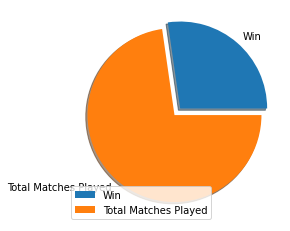

In [9]:
total=df['Team 1'].value_counts()['Sri Lanka']+df['Team 2'].value_counts()['Sri Lanka']
win=df.Winner.value_counts()['Sri Lanka']
win_per=win/total * 100
print('Winning percent of Srilanka is '+str(win_per),'%')
plt.pie([win,total],labels=['Win','Total Matches Played'],explode=[0.1,0],shadow=True)
plt.legend()
plt.show()

What were the top three wins by run?

In [10]:
run=[]
for i in df['Run Margin']:
  try:
    if math.isnan(i):
      run.append(0)
  except:
    run.append(int(i.split()[0]))

#function to find top three maximum value in a list
def top_3(lst,l):
  if len(l)==3:
    return l
  else:
    l.append(lst.index(max(lst)))
    lst[lst.index(max(lst))]=0
    return top_3(lst,l)

run_3=[]
run_3=top_3(run,run_3)

print(f'The top win by run is {df.Winner[run_3[0]]} , second winner is {df.Winner[run_3[1]]} , third is {df.Winner[run_3[2]]}')

The top win by run is England , second winner is England , third is Ireland


Months in which most odis were played?

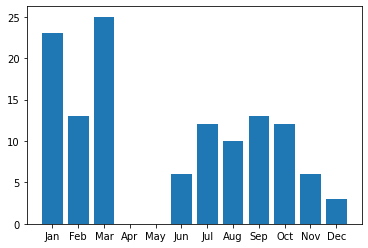

In [11]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
odi={}
for i in month:
  odi[i]=0
  for j in df['Match Date']:
    if i.lower() in j.lower():
      odi[i]+=1
plt.bar(odi.keys(),odi.values())
plt.show()

In [12]:
print('Top Three Months are')
pd.Series(odi).sort_values(ascending=False).head(3)

Top Three Months are


Mar    25
Jan    23
Sep    13
dtype: int64

How many cricket matches were played each month?

Matches played each month are :
Matches played in Jan are 23
Matches played in Feb are 13
Matches played in Mar are 25
Matches played in Apr are 0
Matches played in May are 0
Matches played in Jun are 6
Matches played in Jul are 12
Matches played in Aug are 10
Matches played in Sep are 13
Matches played in Oct are 12
Matches played in Nov are 6
Matches played in Dec are 3


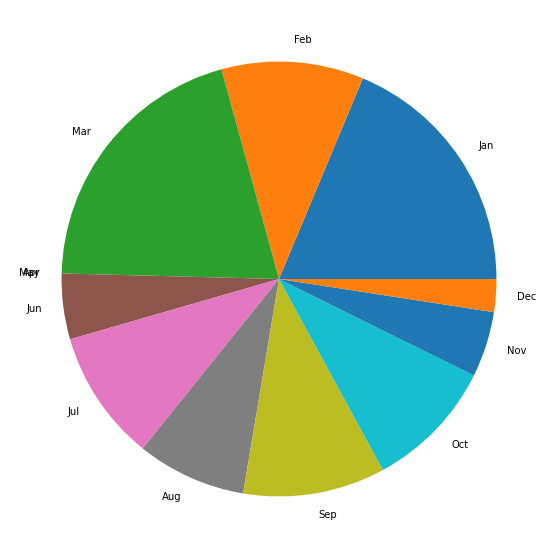

In [13]:
print('Matches played each month are :')
for i in range(len(odi)):
  print(f'Matches played in {list(odi.keys())[i]} are {list(odi.values())[i]}')

f=plt.figure(figsize=(10,10))
plt.pie(odi.values(),labels=odi.keys())
plt.show()

On which ground most games were played

In [14]:
print('Most games were played in ',df.Ground.value_counts().index[0],' ground')

Most games were played in  Harare  ground


Did India won mostly by chasing or playing first?

In [15]:
india=df[np.where(df['Winner']=='India',True,False)]
print('Won By chasing ',india['Run Margin'].isnull().sum(),'games')
print('Won by playing first',india['Wicket Margin'].isnull().sum(),'games')
print('As both value are equal so its an equal probability chance for India to win in both cases')

Won By chasing  7 games
Won by playing first 7 games
As both value are equal so its an equal probability chance for India to win in both cases


Top three countries who win most matches in 2018 , what was their winning % every month?

In [16]:
cummulative_match=pd.Series(odi)
for i in range(1,len(cummulative_match)):
  cummulative_match[i]+=cummulative_match[i-1]
performer=dict(df.Winner.value_counts().head(3))
cummulative_match=dict(cummulative_match)
win_3={}
k=0
for i in performer:
  win_3[i]={}
  for j in cummulative_match:
    try:
      team1=df.iloc[k:cummulative_match[j],:]['Team 1'].value_counts()[i]
    except:
      team1=0
    try:
      team2=df.iloc[k:cummulative_match[j],:]['Team 2'].value_counts()[i]
    except:
      team2=0
    total=team1+team2
    try:
      win=df.iloc[k:cummulative_match[j],:]['Winner'].value_counts()[i]
    except:
      win=0
    k=cummulative_match[j]
    if win!=0 and total!=0:
      win_3[i][j]=win/total
      print('Winning Percent of ',i,' in month of ',j,end=' ')
      print(round((win/total)*100,3),'%',' [Total Matches Played:',total,' Wins :',win,']')
    else:
      print()

Winning Percent of  England  in month of  Jan 80.0 %  [Total Matches Played: 5  Wins : 4 ]
Winning Percent of  England  in month of  Feb 50.0 %  [Total Matches Played: 2  Wins : 1 ]
Winning Percent of  England  in month of  Mar 66.667 %  [Total Matches Played: 3  Wins : 2 ]


Winning Percent of  England  in month of  Jun 83.333 %  [Total Matches Played: 6  Wins : 5 ]
Winning Percent of  England  in month of  Jul 66.667 %  [Total Matches Played: 3  Wins : 2 ]


Winning Percent of  England  in month of  Oct 75.0 %  [Total Matches Played: 4  Wins : 3 ]



Winning Percent of  India  in month of  Feb 83.333 %  [Total Matches Played: 6  Wins : 5 ]




Winning Percent of  India  in month of  Jul 33.333 %  [Total Matches Played: 3  Wins : 1 ]

Winning Percent of  India  in month of  Sep 100.0 %  [Total Matches Played: 5  Wins : 5 ]
Winning Percent of  India  in month of  Oct 66.667 %  [Total Matches Played: 3  Wins : 2 ]
Winning Percent of  India  in month of  Nov 100.0 %  [Total Matches Playe

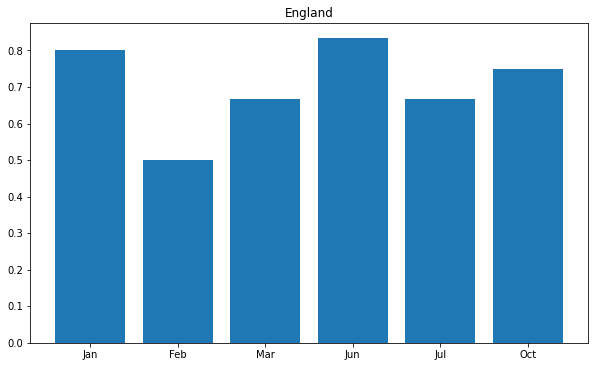

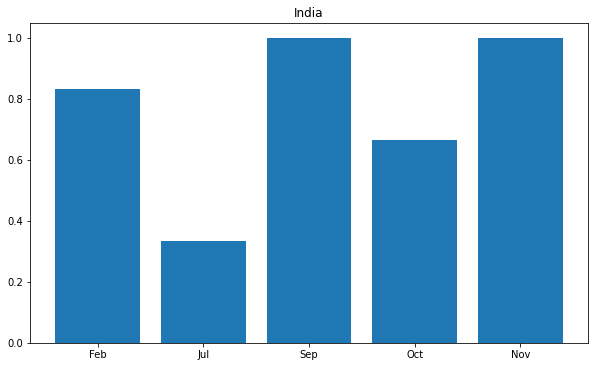

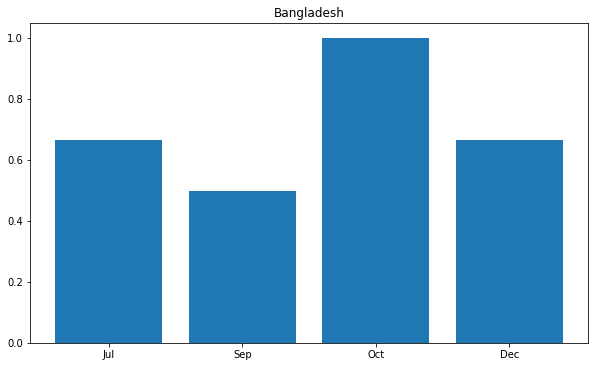

In [17]:
for i in range(3):
  f=plt.figure()
  f.set_figwidth(10)
  f.set_figheight(20)
  plt.subplot(3,1,i+1)
  plt.bar(pd.Series(pd.Series(win_3)[i]).index,pd.Series(pd.Series(win_3)[i]).values)
  plt.title(pd.Series(win_3).index[i])
  plt.show()

Team which had lost most of the matches?

In [18]:
total=[]
win_total=[]
country=pd.Series(list(df['Team 1'])+list(df['Team 2'])).unique()

for i in country:
    try:
      team1=df['Team 1'].value_counts()[i]
    except:
      team1=0
    try:
      team2=df['Team 2'].value_counts()[i]
    except:
      team2=0
    try:
      win=df['Winner'].value_counts()[i]
    except:
      win=0
    total.append(team1+team2)
    win_total.append(win)

In [19]:
print('This dataframe shows the order of countries in ascending order of winning rate')
compar=pd.DataFrame({'Country':country,'Total':total,'Wins':win_total})
compar['Win%']=compar.Wins/compar.Total*100
compar.sort_values(by='Win%').reset_index().drop(columns=['index'])

This dataframe shows the order of countries in ascending order of winning rate


,Country,Total,Wins,Win%
0,Australia,13,2,15.384615
1,Hong Kong,6,1,16.666667
2,Zimbabwe,25,5,20.000000
3,P.N.G.,4,1,25.000000
4,Nepal,3,1,33.333333
5,U.A.E.,11,4,36.363636
6,Sri Lanka,16,6,37.500000
7,West Indies,17,8,47.058824
8,Pakistan,17,8,47.058824
9,Scotland,10,5,50.000000


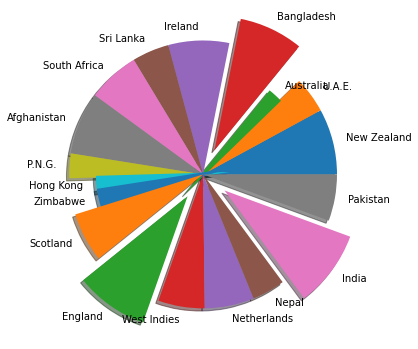

In [20]:
f=plt.figure()
f.set_figheight(50)
plt.pie(compar['Win%'],labels=compar.Country,shadow=True,explode=[0,0,-0.2,0.2,0,0,0,0,0,-0.2,-0.2,0,0.2,0,0,0,.2,0])
plt.show()

Did the team in previous question lost mostly by chasing?

In [44]:
a=np.where(df['Team 2']=='Australia',True,False)
b=np.where(df['Team 1']=='Australia',True,False)
australia=df[a+b].reset_index().drop(columns=['index'])
australia=australia.drop(np.where(australia['Winner']=='Australia')[0])

#where the run margin is nan it signifies the winner team won by chasing and the loser lost by playing first
playfirst=australia['Run Margin'].isnull().sum()
chasing=australia['Wicket Margin'].isnull().sum()

print('Lost by Chasing are ',chasing)
print('Lost by playing first ',playfirst)
if chasing>playfirst:
  print('Australia lost mostly by chasing')
elif chasing==playfirst:
  print("Australia's loosing analytics is same for both chasing and playing first")
else:
  print('Australia lost mostly by playing first')

Lost by Chasing are  6
Lost by playing first  6
Australia's loosing analytics is same for both chasing and playing first
